In [2]:
# Predicting Bike Rentals

In [4]:
import pandas

bike_rentals = pandas.read_csv("./data/bike_rental_hour.csv")
bike_rentals.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


(17379,)


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

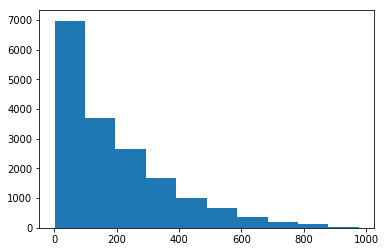

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

print (bike_rentals["cnt"].shape)
plt.hist(bike_rentals["cnt"])

In [6]:
# already know they are all numeric data. (no categorial columns)
bike_rentals.corr()["cnt"] # every column points to "cnt" for correlations

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [8]:
# Manually set up categorical data transforming with out using dummy
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals["time_label"].head()

0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64

## Error metric

The mean squared error metric makes the most sense to evaluate our error.  MSE works on continuous numeric data, which fits our data quite well.

In [9]:
print (bike_rentals.shape)
train = bike_rentals.sample(frac=.8) # 80% for training
train.shape

(17379, 18)


(13903, 18)

In [10]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.shape

(3476, 18)

In [12]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
print (len(predictors))

# manually remove irrelavant columns
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")
print (len(predictors))

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

18
14


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
import numpy
predictions = reg.predict(test[predictors])

# MSE
numpy.mean((predictions - test["cnt"]) ** 2)

17039.902389019324

In [17]:
test["cnt"]

4          1
6          2
7          3
8          8
13        94
24        17
26         9
40        65
48         2
54        88
57        61
59        77
63       157
64       110
66        52
76       179
77       100
84        83
103       79
106       62
110      132
116        4
126       84
131      172
132      163
136       52
138       17
142        5
143       34
152       72
        ... 
17232     34
17237      1
17238      2
17241     36
17262      1
17264     11
17269     75
17273    119
17279     91
17280     63
17282     26
17284      9
17285      5
17296    222
17300    271
17303     97
17314     18
17324    118
17328     60
17329     54
17330     32
17331     41
17332     28
17334     15
17336      2
17348    123
17350    102
17351     72
17372    164
17375     89
Name: cnt, Length: 3476, dtype: int64

## Error

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts.  Larger errors are penalized more with MSE, which leads to a higher total error.

In [18]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2609.475813523458

In [20]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

3104.6388329497504

## Decision tree error

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [21]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

1892.5328973807577

## Random forest error

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.